# README

Synthetic Tubulin (GFP) Reconstruction 

`train_data`

the corresponding low and high pairs of image patches (in python/numpy npz file format)

`test_data`

the test stacks used for the analysis. 

`input_n_avg_10_all.tif` - the widefield input stack 

`frames1-20_input_n_avg_10_all.tif` - the SRRF stack (FIXME)

In [1]:
import numpy as np
from csbdeep.utils.plot_utils import plot_some
from matplotlib import pyplot as plt
import tifffile as tif

In [2]:
def npadrr_info(adrr: np.ndarray) -> None:
    print(f'shape: {adrr.shape}')
    print(f'dtype: {adrr.dtype}')

# 1. Train Data

In [3]:
train_path = './train_data/data_label.npz'
train_file = np.load(train_path)
print(train_file.files)

['Y', 'X']


### 1.1. LR
- 数量: 5872
- 通道: 1
- 尺寸：128x128

In [4]:
train_lr = train_file['X']
npadrr_info(train_lr)

shape: (5872, 1, 128, 128)
dtype: float32


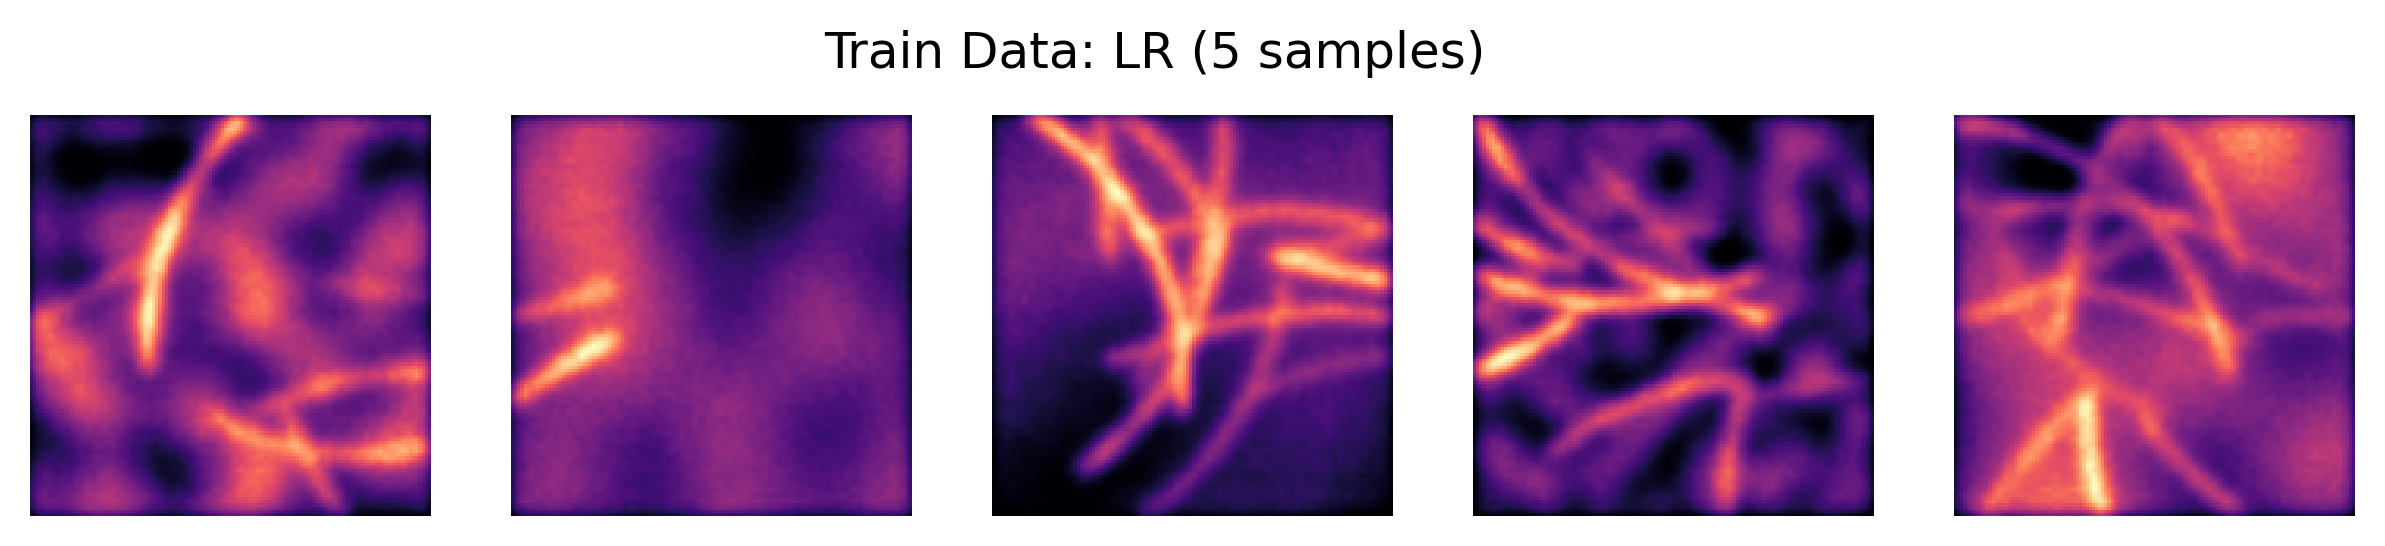

In [5]:
plt.figure(figsize=(10,2), dpi=300)
plt.suptitle('Train Data: LR (5 samples)')
plot_some(train_lr[0:5])
plt.show()

### 1.2. HR
- 数量: 5872
- 通道: 1
- 尺寸：128x128

In [6]:
train_hr = train_file['Y']
npadrr_info(train_hr)

shape: (5872, 1, 128, 128)
dtype: float32


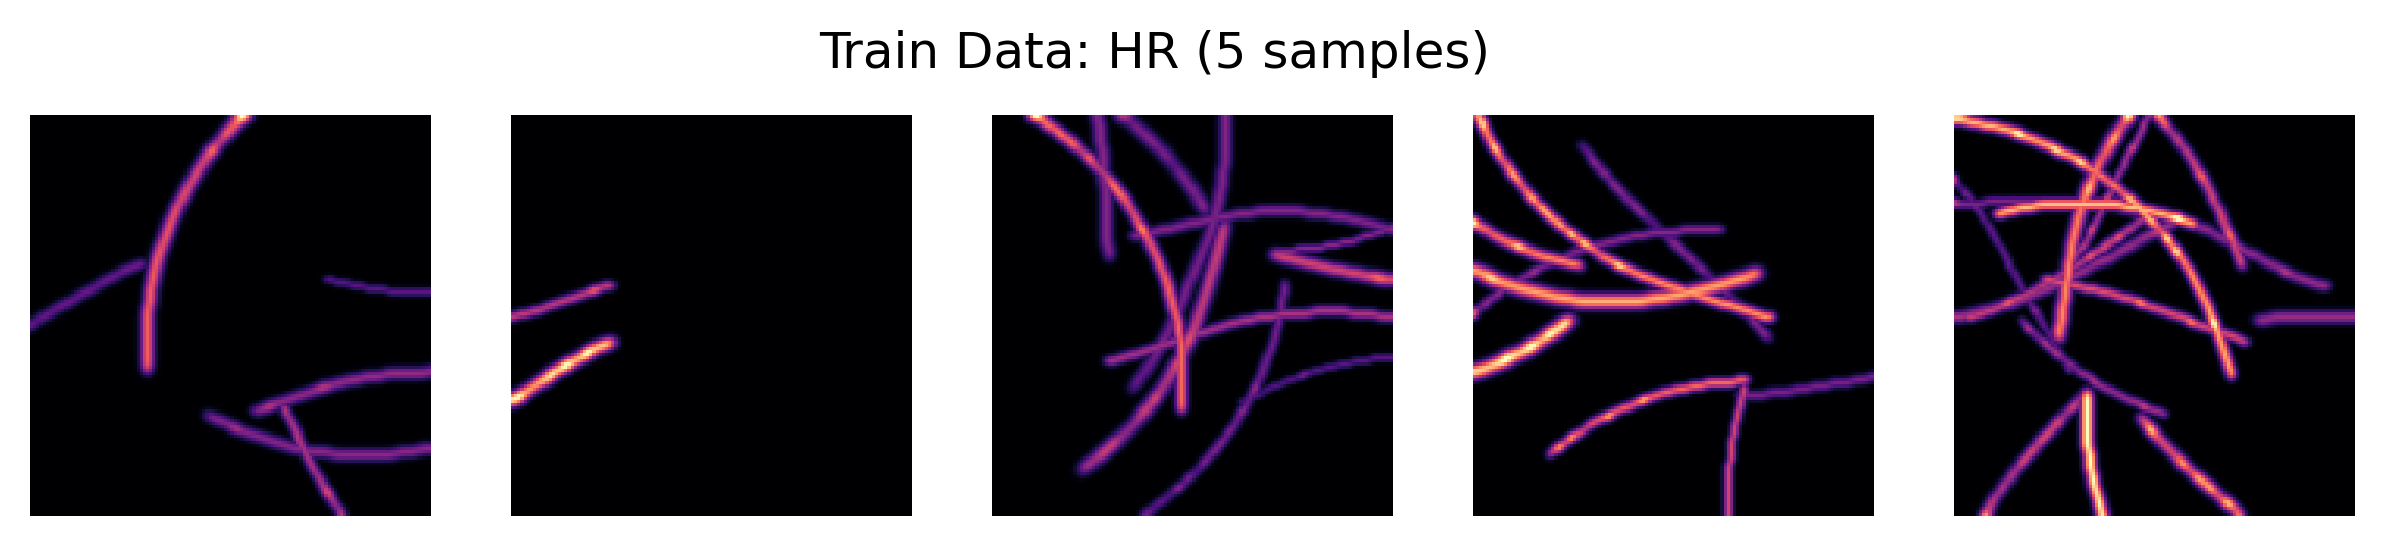

In [7]:
plt.figure(figsize=(10,2), dpi=300)
plt.suptitle('Train Data: HR (5 samples)')
plot_some(train_hr[0:5])
plt.show()

# 2. Test Set

In [8]:
test_path = ['./test_data/input_n_avg_10_all.tif', './test_data/frames1-20_input_n_avg_10_all.tif']

### 2.1. Widefield Stack
- 数量: 400
- 通道: 1
- 尺寸: 512x256

In [9]:
test_widefield_stack = tif.imread(test_path[0])
npadrr_info(test_widefield_stack)

shape: (400, 256, 512)
dtype: uint16


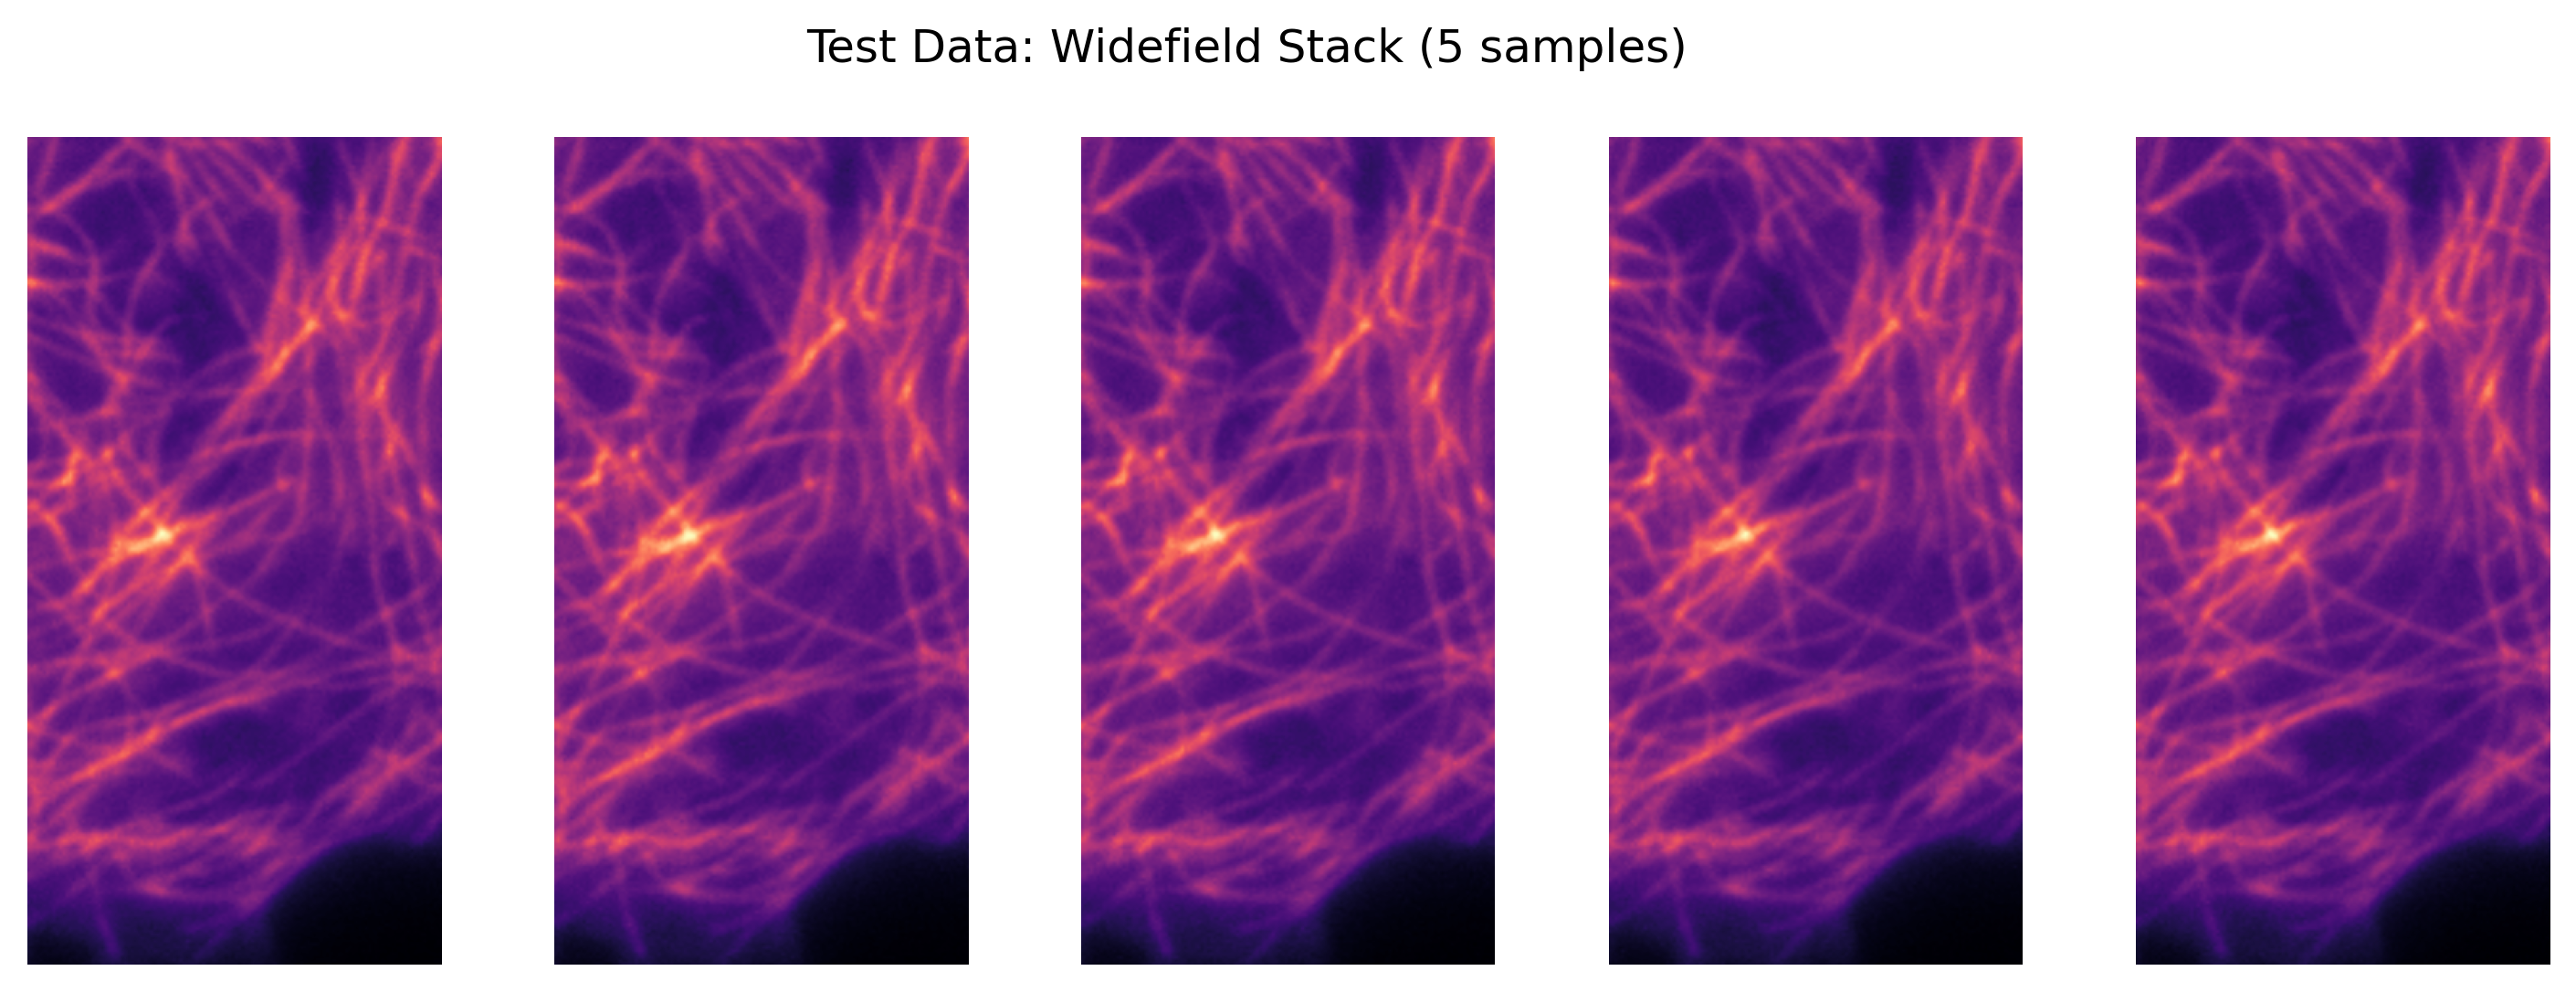

In [10]:
plt.figure(figsize=(12,4), dpi=300)
plt.suptitle('Test Data: Widefield Stack (5 samples)')
plot_some(np.moveaxis(test_widefield_stack[10:15], 1, -1))
plt.show()

### 2.1. SRRF Stack
- 数量: 20
- 通道: 1
- 尺寸: 512x256

In [11]:
test_srrf_stack = tif.imread(test_path[1])
npadrr_info(test_srrf_stack)

shape: (20, 256, 512)
dtype: uint16


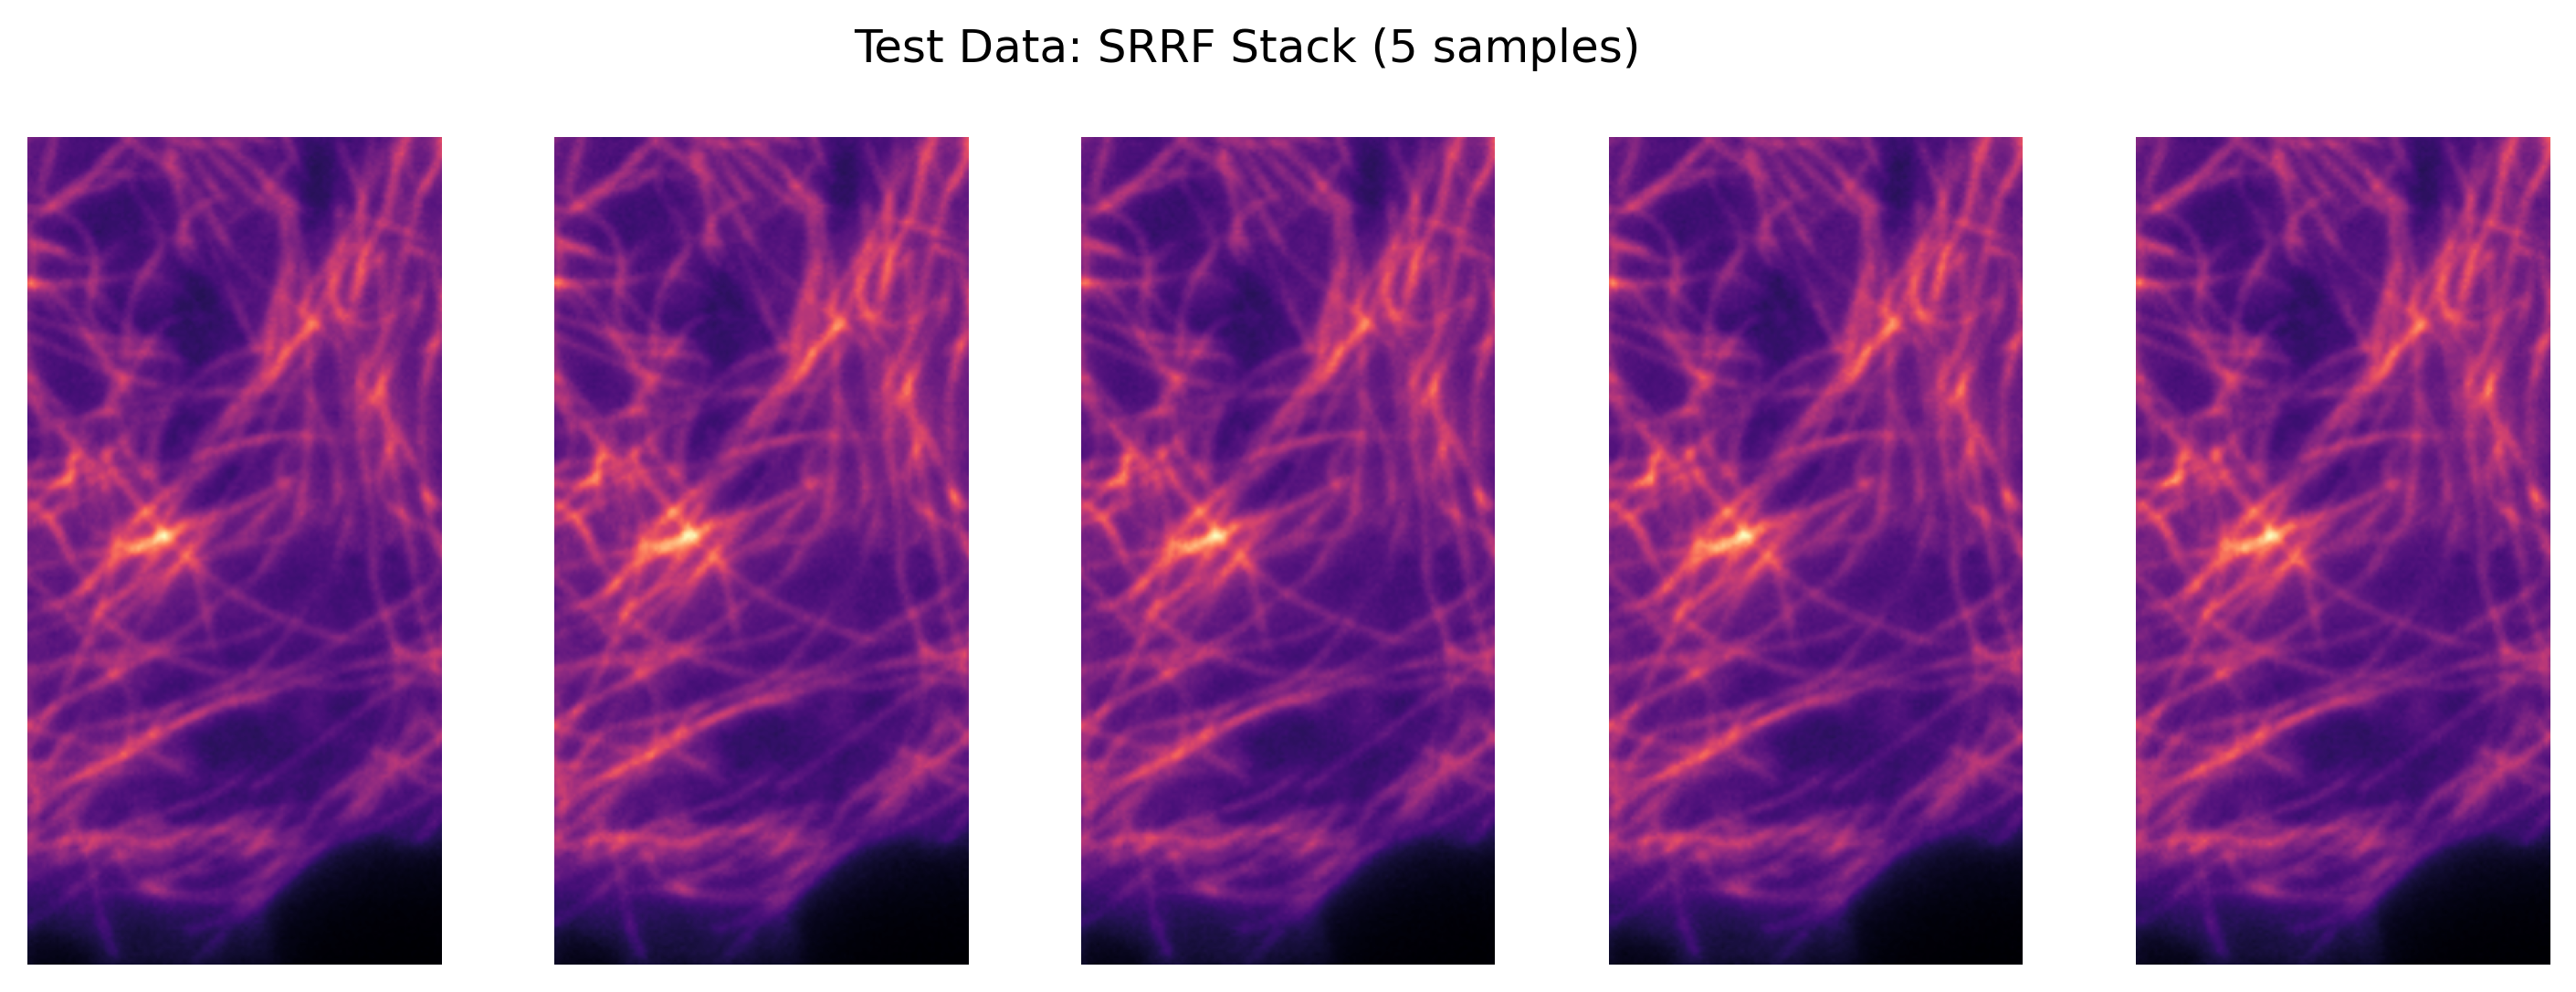

In [12]:
plt.figure(figsize=(12,4), dpi=300)
plt.suptitle('Test Data: SRRF Stack (5 samples)')
plot_some(np.moveaxis(test_srrf_stack[5:10], 1, -1))
plt.show()